In [2]:
from __future__ import annotations

class GeomShape:
    """Main class for circle and rectangle defining center point (x, y) of shape"""
    def __init__(self, x_center: float|int , y_center: float|int) -> None:
        print("GS__init__ körs")
        self.x_center = x_center
        self.y_center = y_center
    
    # getters
    @property
    def x_center(self) -> float|int:
        print("GS x_center getter körs")
        return self._x_center
    
    @property
    def y_center(self) -> float|int:
        print("GS y_center getter körs")
        return self._y_center

    #setters
    @x_center.setter
    def x_center(self, value: float|int) -> float|int:
        print("GS x_center setter körs")
        if not isinstance(value, (float, int)):
            raise TypeError (f"x_center must be an int or float and not {type(value)}")
        self._x_center = value
    
    @y_center.setter
    def y_center(self, value: float|int) -> float|int:
        print("GS y_center setter körs")
        if not isinstance(value, (float, int)):
            raise TypeError (f"y_center must be an int or float and not {type(value)}")
        self._y_center = value
    
    def __repr__(self) -> str:
        return f"Superclass 'GeomShapes', '{self.x_center}', '{self.y_center}'"
    
    def __str__(self) -> str:
        return f"Shape centered in (x,y) = ({self.x_center},{self.y_center})"
    
    def __gt__(self, other: float) -> bool:
        """Returns True if area of first shape is grater than the second shape"""
        return self.area > other.area
    
    def __ge__(self, other: float) -> bool:
        """Returns True if area of first shape is grater than or equal to the second shape"""
        return self.area >= other.area
    
    def __lt__(self, other: float) -> bool:
        """Returns True if area of first shape is smaler than the second shape"""
        return self.area < other.area
    
    def __le__(self, other: float) -> bool:
        """Returns True if area of first shape is smaller than or equal to the second shape"""
        return self.area <= other.area
    
    def __eq__(self, other: float) -> bool:
        """Returns True if shapes are of the same type and have the same area"""
        if self.area == other.area and type(self) == type(other):
            return True
        else:
            return False

    def translate(self, x_new: float|int, y_new: float|int) -> None:
        """Moves shape to new center point"""
        if not isinstance(x_new, (float, int)):
            raise TypeError (f"x_new must be int or float and not {type(x_new)}")
        if not isinstance(y_new, (float, int)):
            raise TypeError (f"y_new must be int or float and not {type(y_new)}")
        self.x_center = x_new
        self.y_center = y_new
        return self

    

In [3]:
import math

class Circle(GeomShape):
    """Circle with defined radius and thus area and circumference"""
    
    def __init__(self, x_center: float|int, y_center: float|int, radius: float|int) -> None:
        print("C__init__ körs")
        super().__init__(x_center, y_center)
        self.radius = radius
        self._area = None                   # To make sure value is None to begin with
        self._circumference = None          # To make sure value is None to begin with
    
    # getters
    @property
    def radius(self) -> float|int:
        print("C radus getter körs")
        return self._radius
    
    @property
    def area(self) -> float|int:
        print("C area getter körs")
        if self._area is not None:          # is values is assigend already, does not have to be calculated again
            return self._area
        else:
            self._area = math.pi * self._radius ** 2 #måste vara ._area då finns ingen sätter; _radius to get value faster as does not go via getter
            return self._area                           # lek med att testa hur programmet körs med _radus och radius

    @property
    def circumference(self) -> float|int:
        print("C circumference getter körs")
        if self._circumference is not None:
            return self._circumference
        else:
            self._circumference = 2 * math.pi * self._radius
            return self._circumference
    
    #setters
    @radius.setter
    def radius(self, value) -> float|int:
        print("C radius setter körs")
        if not isinstance (value, (float, int)):
            raise TypeError (f"Radius must be a float or an int and not {type(value)}")
        if value <= 0:
            raise ValueError ("Radius must be larger than 0")
        self._radius = value
    
    # no setters for area or circumference as they are read-only

    def __repr__(self) -> str:
        return f"Circle ({self.x_center}, {self.y_center}, {self.radius})"
    
    def __str__(self) -> str:
        return f"Circle: center (x,y) = ({self.x_center},{self.y_center}), radius = {self.radius}, area = {self.area}, circumference = {self.circumference}"
    
    def is_inside(self, x_point: float|int, y_point: float|int) -> bool:
        """Checks if a given point is within the circumference of the shape"""
        if not isinstance(x_point, (float, int)):
            raise TypeError (f"x_point must be int or float and not {type(x_point)}")
        if not isinstance(y_point, (float, int)):
            raise TypeError (f"y_point must be int or float and not {type(y_point)}")

        point_distance = math.sqrt((x_point-self.x_center)**2 + (y_point-self.y_center)**2)
        if point_distance <= self.radius:
            return True
        else:
            return False
    
    def is_unitcircle(self) -> bool:
        """Checks if a circle is a unitcircle (radius = 1 and centerded at origo)"""
        if self.radius == 1 and self.x_center == 0 and self.y_center == 0:
            return True
        else:
            return False


In [4]:
c1 = Circle(0,0,5)
print(c1.area)

C__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
C radius setter körs
C area getter körs
78.53981633974483


In [5]:
class Rectangle(GeomShape):
    """Rectangle with defined sides (side a along x-axis, side b along y-axis) and thus area and circumference"""
    
    def __init__(self, x_center: float|int, y_center: float|int, side_a: float|int, side_b: float|int) -> None:
        print("R__init__ körs")
        super().__init__(x_center, y_center) #ingen self med här då super() lägger på self själv
        self.side_a = side_a
        self.side_b = side_b
        self._area = None
        self._circumference = None
    
    # getters
    @property
    def side_a(self) -> float|int:
        print("R side_a getter körs")
        return self._side_a
    
    @property
    def side_b(self) -> float|int:
        print("R side_b getter körs")
        return self._side_b
    
    @property
    def area(self) -> float|int:
        print("R area getter körs")
        if self._area is not None:
            return self._area
        else:
            self._area = self.side_a * self.side_b
            return self._area
    
    @property
    def circumference(self) -> float|int:
        print("R circumference getter körs")
        if self._circumference is not None:
            return self._circumference
        else:
            self._circumference = 2 * (self.side_a + self.side_b)
            return self._circumference
    
    #setters
    @side_a.setter
    def side_a(self, value) -> float|int:
        print("R side_a setter körs")
        if not isinstance (value, (float, int)):
            raise TypeError (f"Side must be a float or an int and not {type(value)}")
        if value <= 0:
            raise ValueError ("Side must be larger than 0")
        self._side_a = value
    
    @side_b.setter
    def side_b(self, value) -> float|int:
        print("R side_b setter körs")
        if not isinstance (value, (float, int)):
            raise TypeError (f"Side must be a float or an int and not {type(value)}")
        if value <= 0:
            raise ValueError ("Side must be larger than 0")
        self._side_b = value
    
    # no setters for area or circumference as they are read-only

    def __repr__(self) -> str:
        return f"Rectancgle ({self.x_center}, {self.y_center}, {self.side_a}, {self.side_b})"
    
    def __str__(self) -> str:
        return f"Rectangle: center (x,y) = ({self.x_center},{self.y_center}), sides = ({self.side_a}, {self.side_b}), area = {self.area}, circumference = {self.circumference}"
    
    def __eq__(self, other: float) -> bool:
        """Returns True if shapes are of the same type, have the same area and the same side lenghts"""
        eq_GeomFig_result = super().__eq__(other)
        if eq_GeomFig_result and self.side_a == other.side_a:
            return True
        else:
            return False
    
    def is_inside(self, x_point: float|int, y_point: float|int) -> bool:
        """Checks if a given point is within the circumference of the shape"""
        if not isinstance(x_point, (float, int)):
            raise TypeError (f"x_point must be int or float and not {type(x_point)}")
        if not isinstance(y_point, (float, int)):
            raise TypeError (f"y_point must be int or float and not {type(y_point)}")

        x_max = self.x_center + self.side_a/2
        x_min = self.x_center - self.side_a/2
        y_max = self.y_center + self.side_b/2
        y_min = self.y_center - self.side_b/2

        if x_point <= x_max and x_point >= x_min and y_point <= y_max and y_point >= y_min:
            return True
        else:
            return False
    
    def is_square(self) -> bool:
        """Checks if the rectangle is a square"""
        if self.side_a == self.side_b:
            return True
        else:
            return False


In [6]:
r1 = Rectangle (1,1,1,2)
r2 = Rectangle (1,1,2,1)
r1 <= r2
r1 == r2

R__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
R side_a setter körs
R side_b setter körs
R__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
R side_a setter körs
R side_b setter körs
R area getter körs
R side_a getter körs
R side_b getter körs
R area getter körs
R side_a getter körs
R side_b getter körs
R area getter körs
R area getter körs
R side_a getter körs
R side_a getter körs


False

In [25]:
from classes import Circle, Rectangle
import matplotlib.pyplot as plt

class Draw:
    """Draws circles and rectangles in a cooridnate system"""
    def __init__(self, *shapes) -> None:
        self.shapes = shapes
    
    def draw(self) -> None:
        fig, ax = plt.subplots()
        ax.set(xlabel = "x", ylabel = "y", title = "Shape", xlim = (-5,5), ylim = (-5,5))

        for shape in self.shapes:
            if isinstance(shape, Circle):
                patch = plt.Circle((shape.x_center, shape.y_center), shape.radius, fill = False)
            elif isinstance(shape, Rectangle):
                patch = plt.Rectangle((shape.x_center, shape.y_center), shape.side_a, shape.side_b, fill = False)
    
            ax.add_patch(patch)
        plt.show()

        
        
    
    #def draw_rectangle(self, rectangle):
        #pts.Rectangle((rectangle.x_center - 0.5 * rectangle.side_a, rectangle.y_center - 0.5 * rectangle.side_b), rectangle.side_a, rectangle.side_b)

C__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
C radius setter körs
C__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
C radius setter körs
R__init__ körs
GS__init__ körs
GS x_center setter körs
GS y_center setter körs
R side_a setter körs
R side_b setter körs
GS x_center getter körs
GS y_center getter körs
C radus getter körs
GS x_center getter körs
GS y_center getter körs
C radus getter körs
GS x_center getter körs
GS y_center getter körs
R side_a getter körs
R side_b getter körs


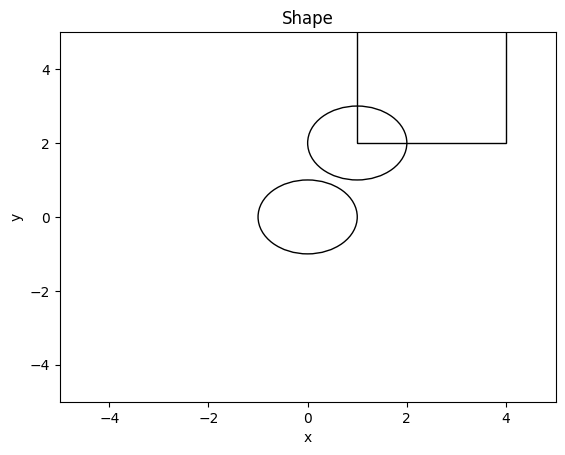

In [27]:
c1 = Circle(0, 0, 1)
c2 = Circle(1, 2, 1)
r1 = Rectangle(1,2,3,4)
d1 = Draw(c1, c2, r1)
d1.draw()
